# Mutivariate Regression Analysis

Dalam model ini akan diaplikasikan konsep regresi multivariat untuk melihat pengaruh beberapa faktor terhadap income atau penghasilan pada penjualan. Disini akan digunakan dataset Lemonade yang terdiri dari 32 baris yang menandakan penjualan selama 32 hari

## Assumptions of the Model

Perlu diketahui bahwa tidak semua problem dapat diselesaikan dengan linear regression. Untuk pemodelan dengan linear regression, terdapat beberapa asumsi yang harus dipenuhi, yaitu :

- ***Terdapat hubungan linear antara variabel input (feature) dan variabel output(label)***. Untuk melihat hubungan linear feature dan label, dapat menggunakan chart seperti scatter chart. Untuk mengetahui hubungan dari variabel umumnya dilakukan pada tahap eksplorasi data.
- ***Residual Harus Berdistribusi Normal***. Agar model regresi valid, maka resiudal dari model harus berdistribusi normal. Hal ini dapat kita baca dari hasil summary dari model, yaitu skew. Semakin nilainya mendekati nol maka distribusi residual mendekati normal. atau kita bisa lihat dengan menggunakan visualisasi QQ pplot
- ***Tidak ada multicollinearity antara features atau terdapat sedikit multicollinearity***. Multicollinearity artinya terdapat dependency (ketergantungan) antara feature, misalnya saja hanya bisa mengetahui nilai feature B jika nilai feature A sudah diketahui, artinya variabel independen/ features tidak terlalu berkorelasi.
- ***data tidak terdapat heteroskedastisitas.***
 heteroskedastisitas adalah kondisi ketika yang terjadi justru variansinya semakin membesar atau mengecil, selain distribusi dari residual harus mendekati atau berdistribusi normal, homoskedastisitas adalah salah satu syarat yang harus dipenuhi agar model yang dibuat valid. Homoskedastisitas adalah kondisi dimana variansi dari error seragam.
- ***Tidak ada autocorrelation dalam data***, contohnya pada time-series data.

## Import our Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Load the Data into Pandas

In [2]:
df = pd.read_csv('/content/Lemonade2016-2.csv')

#Mengisi nilai kosong pada kolom date
df['Date'].fillna(value='7/8/2016', inplace=True)

In [3]:
#Mengisi nilai kosong pada kolom Leaflets
mean = float(round(df['Leaflets'].mean()))
df['Leaflets'].fillna(value = mean, inplace=True)

In [4]:
#Menghapus duplikat data
df = df.drop_duplicates().reset_index(drop=True)

In [5]:
#Menambah beberapa kolom fiture untuk keperluan explor data
df['Sale'] = df['Lemon'] + df['Orange']
df['income'] = df['Sale'] * df['Price']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         31 non-null     object 
 1   Location     31 non-null     object 
 2   Lemon        31 non-null     int64  
 3   Orange       31 non-null     int64  
 4   Temperature  31 non-null     int64  
 5   Leaflets     31 non-null     float64
 6   Price        31 non-null     float64
 7   Sale         31 non-null     int64  
 8   income       31 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 2.3+ KB


In [7]:
df

,Date,Location,Lemon,Orange,Temperature,Leaflets,Price,Sale,income
0,7/1/2016,Park,97,67,70,90.0,0.25,164,41.00
1,7/2/2016,Park,98,67,72,90.0,0.25,165,41.25
2,7/3/2016,Park,110,77,71,104.0,0.25,187,46.75
3,7/4/2016,Beach,134,99,76,98.0,0.25,233,58.25
4,7/5/2016,Beach,159,118,78,135.0,0.25,277,69.25
5,7/6/2016,Beach,103,69,82,90.0,0.25,172,43.00
6,7/7/2016,Beach,143,101,81,135.0,0.25,244,61.00
7,7/8/2016,Beach,123,86,82,113.0,0.25,209,52.25
8,7/9/2016,Beach,134,95,80,126.0,0.25,229,57.25
9,7/10/2016,Beach,140,98,82,131.0,0.25,238,59.50


Sebelumnya sudah dilakukan uji regresi multivariat pada data di atas, hasilnya menunjukan bahwa data di atas memenuhi multikoleniaritas dan autokorelasi di mana artinya bahwa data di atas tidak valid untuk digunakan karena tidak memenuhi syarat. Maka untuk solusinya dilakukan transformasi data dengan MinMaxScaler

In [8]:
from sklearn.preprocessing import MinMaxScaler  

#Define MinMaxScaler as scaler  
scaler = MinMaxScaler()  
#list all the feature that need to be scaled  
scaling_column = ['Lemon','Orange','Temperature','Leaflets','Price','Sale','income']#,'Beach','Park']
#Apply fit_transfrom to scale selected feature  
df_coba = df.copy()
df_coba[scaling_column] = scaler.fit_transform(df_coba[scaling_column])
#Cheking min and max value of the scaling_column
df_coba[scaling_column].describe()

,Lemon,Orange,Temperature,Leaflets,Price,Sale,income
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,0.434101,0.440860,0.633641,0.457348,0.432258,0.437164,0.299120
std,0.248919,0.254376,0.292620,0.220234,0.453422,0.251187,0.263257
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.257143,0.281609,0.500000,0.272222,0.000000,0.268229,0.117647
50%,0.419048,0.402299,0.714286,0.444444,0.400000,0.406250,0.197861
75%,0.585714,0.609195,0.857143,0.622222,1.000000,0.593750,0.489305
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
df = df_coba.copy()

## Check for Multicollinearity

Setelah memuat data, kita akan memvalidasi salah satu asumsi dengan memeriksa apakah data multicollinearity. Salah satu asumsi model yang harus dipenuhi adalah bahwa tidak ada multicollinearity. multicollinearity adalah dimana salah satu variabel sangat berkorelasi dengan variabel lainnya. contohnya adalah ketika salah satu variabel X berkorelasi hampir sempurna dengan variabel X yang lainnya atau bahkan sempurna.

### How to test for multicollinearity?

Hal pertama yang dapat kita lakukan adalah membuat matriks korelasi menggunakan fungsi ***corr()***, metode ini akan membuat matriks dengan masing-masing variabel memiliki korelasi yang dihitung untuk semua variabel lainnya. 

,Lemon,Orange,Temperature,Leaflets,Price,Sale,income
Lemon,1.000000,0.996714,0.477345,0.857512,-0.270530,0.999309,0.469276
Orange,0.996714,1.000000,0.453116,0.826333,-0.318083,0.999036,0.426955
Temperature,0.477345,0.453116,1.000000,0.287209,-0.033575,0.466616,0.339447
Leaflets,0.857512,0.826333,0.287209,1.000000,0.032040,0.843905,0.600593
Price,-0.270530,-0.318083,-0.033575,0.032040,1.000000,-0.292572,0.702259
Sale,0.999309,0.999036,0.466616,0.843905,-0.292572,1.000000,0.450239
income,0.469276,0.426955,0.339447,0.600593,0.702259,0.450239,1.000000


----------------------------------------------------------------------------------------------------


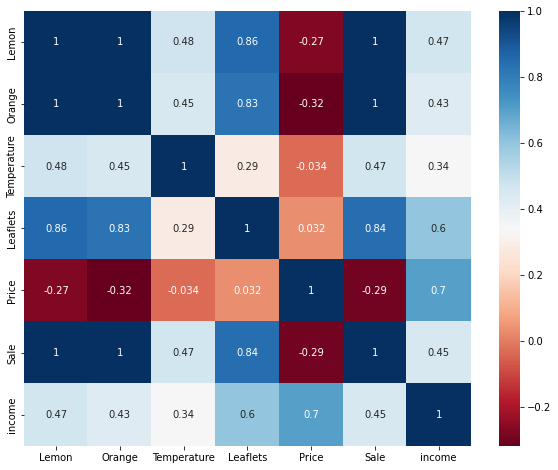

In [10]:
# menghitung matriks korelasi
corr = df.corr()

# menampilkan matriks korelasi
display(corr)
print('-'*100)

# plot korelasi dengan heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu', annot=True)
plt.show()

Dapat dilihat hasil dari gambar matrik korelasi di atas, kita dapat mengidentifikasi beberapa variabel yang sangat berkorelasi. Misalnya, jika Anda melihat korelasi antara 'Orange' dan 'Sale, hasilnya sempurna 1,00. Ini adalah korelasi yang sangat tinggi dan menandainya sebagai kandidat untuk dihapus.

Metode lain yang bisa kita gunakan adalah ***variance_inflation_factor*** yang merupakan ukuran seberapa besar kontribusi variabel tertentu terhadap standar error dalam model regresi. Ketika terjadi multicollinearity yang signifikan, faktor inflasi varians akan sangat besar untuk variabel-variabel dalam perhitungan.

Dalam praktiknya jika salah satu nilai VFI variabel tersebut bernilai ***5 atau lebih tinggi***, maka variabel tersebut harus dikeluarkan dari model. Disini akan ditunjukan bagaimana VFI sebelum variabel yang sangat berkorelasi dibuang dan setelah variabel yang sangat berkorelasi dibuang.

In [11]:
# define two data frames one before the drop and one after the drop
df_b = df.drop(['Date','Location'], axis=1)
df_a = df[['Temperature', 'Leaflets', 'Price', 'income']]
df_before = df_b.drop(['income'], axis=1)
df_after = df_a.drop(['income'], axis=1)

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(df_before)
X2 = sm.tools.add_constant(df_after)

# create the series for both
series_before = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)
series_after = pd.Series([variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])], index=X2.columns)

# display the series
print('DATA SEBELUM')
print('-'*100)
display(series_before)
print()

print('DATA SESUDAH')
print('-'*100)
display(series_after)

DATA SEBELUM
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


const          22.608791
Lemon                inf
Orange               inf
Temperature     2.835988
Leaflets       14.194574
Price           1.825912
Sale                 inf
dtype: float64


DATA SESUDAH
----------------------------------------------------------------------------------------------------


const          9.183717
Temperature    1.092086
Leaflets       1.091976
Price          1.003030
dtype: float64

Dari hasil data di atas, dapat disimpulkan bahwa pada dataframe yang beberapa variabelnya berkorelasi sangat tinggi setelah dibuang menunjukan nilai VFI yang **kurang dari 5** yang artinya variabel-variabel tersebut dapat digunakan dan memungkinkan data tidak multicollinearity. Sedangkan pada dataframe dengan variabelnya yang berkorelasi sangat tinggi tidak dibuang menunjukan terdapat nilai VFI yang **lebih dari 5** pada beberapa variabelnya yang artinya apabila variabel tersebut digunakan akan memungkinkan data multicollinearity

di sini juga terdapat cara lain dengan memvisualisasikan data untuk memeriksa multicollinearity. Di dalam library pandas, ada ***scatter_matrix*** yang akan membuat scatter plot untuk setiap variabel dalam kumpulan data terhadap variabel lain.

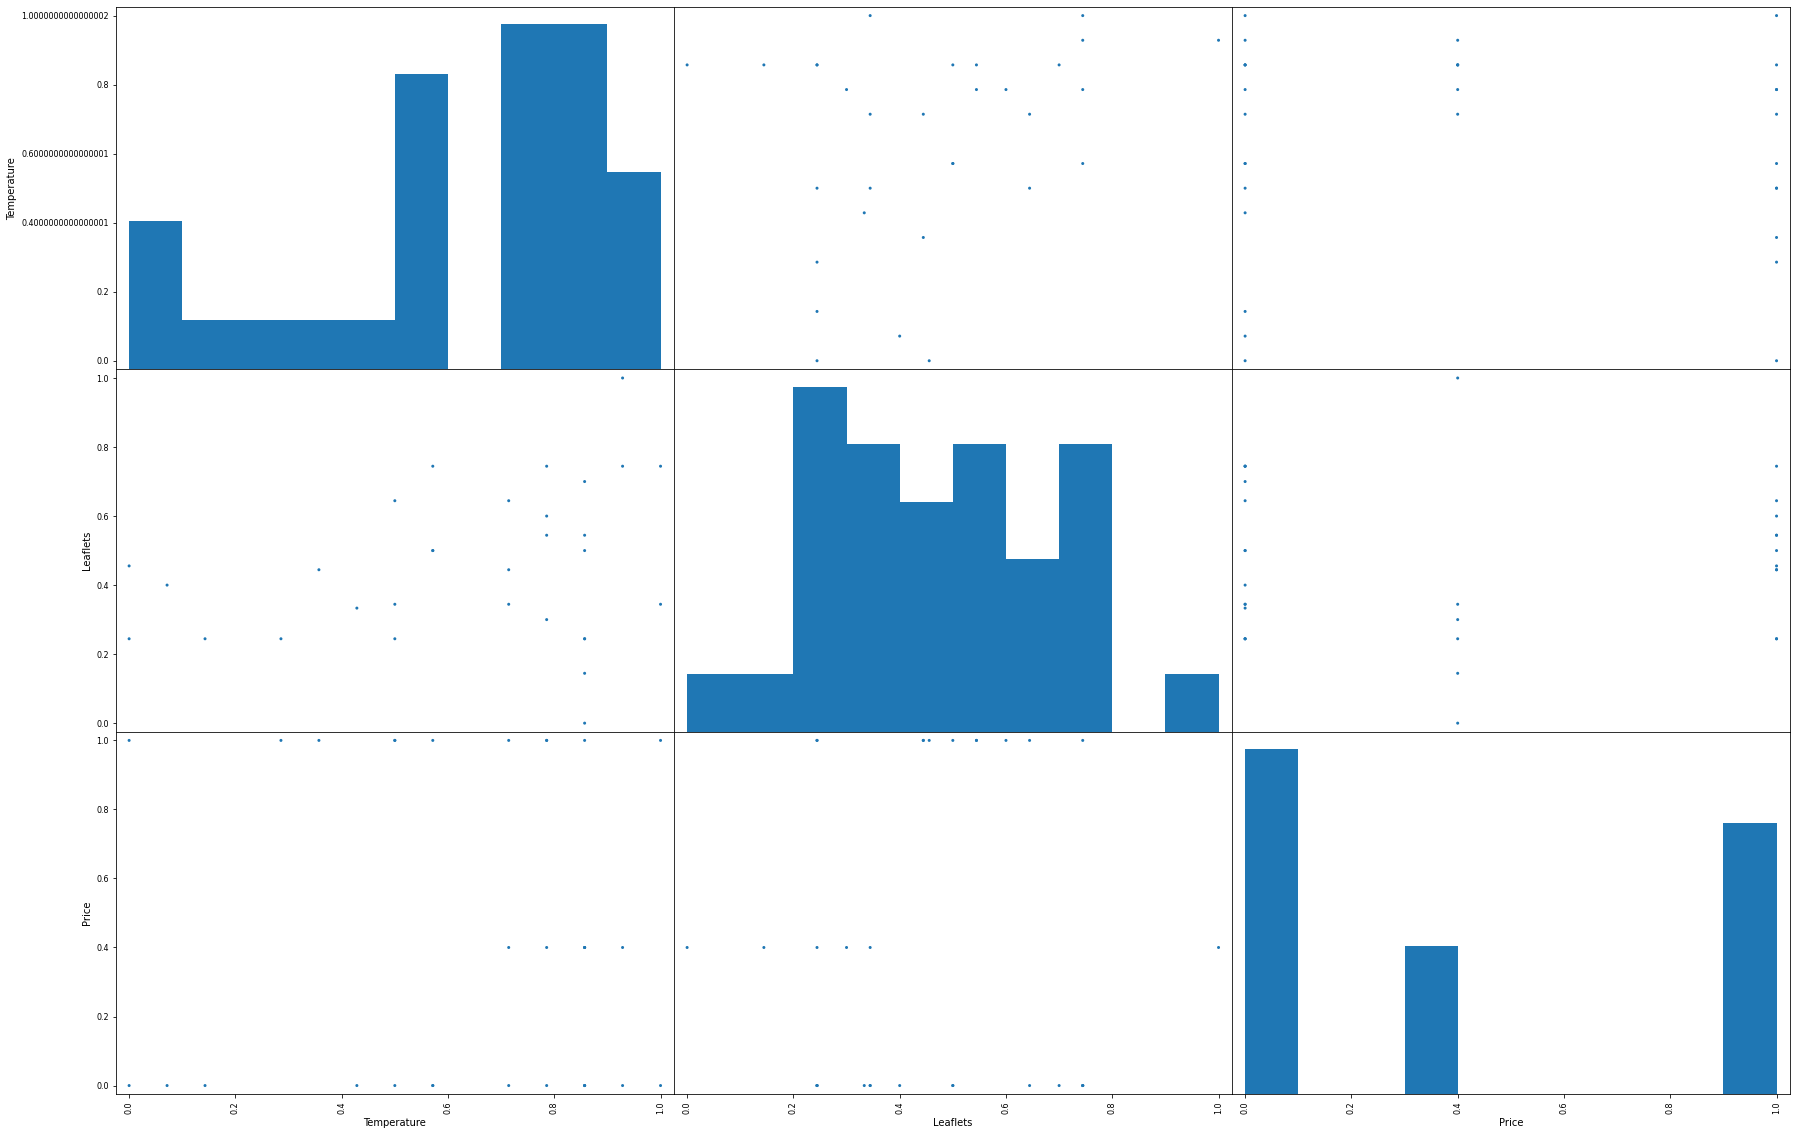

In [12]:
# define the plot
pd.plotting.scatter_matrix(df_after, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

## Build the Model

In [13]:
# define our input variable (X) & output variable
X = df_a.drop(['income'], axis=1)
Y = df_a['income']

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X, Y)

LinearRegression()

### Exploring the Output

***Faktor Intercept dan koefisien Regresi***

Berdasarkan output tersebut model regresi dapat ditulis sebagai berikut :

In [14]:
list1 = []
for i in regression_model.coef_:
  list1.append(i)

In [15]:
print('income = {:.4} + ({:.4}*Temperature) + ({:.4}*Leaflets) + ({:.4}*Price)'.format(regression_model.intercept_, list1[0],list1[1],list1[2]))

income = -0.2795 + (0.1928*Temperature) + (0.6178*Leaflets) + (0.4023*Price)


In [16]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_
coefficent = regression_model.coef_[0]

print("The intercept for our model is {:.4}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_):
    print("The Coefficient for {} is {:.2}".format(coef[0],coef[1]))

The intercept for our model is -0.2795
----------------------------------------------------------------------------------------------------
The Coefficient for Temperature is 0.19
The Coefficient for Leaflets is 0.62
The Coefficient for Price is 0.4


## Evaluating the Model

In [17]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


### Checking for Heteroscedasticity

Selanjutnya akan dilihat bahwa pada data tidak terdapat Heteroskedastisitas untuk memenuhi syarat pada pengujian regresi.

Untuk memeriksa heteroskedastisitas, kita dapat memanfaatkan modul statsmodels.stats.diagnostic. Modul ini akan memberi kita beberapa fungsi pengujian yang dapat kita jalankan diantaranya yaitu **Breusch-Pagan** test dan **White** test untuk heteroskedastisitas. Lalu di sini juga akan digunakan **Goldfeld Quandt** Test untuk memeriksa heteroskedastisitas

**Rumusan Hipotesis**

H0 : tidak terdapat gejala heteroskedastisitas

H1 : terdapat gejala heteroskedastisitas

**Kriteria Uji**

dengan mengambil α sebesar 0.05, jika nilai p > α maka H0 diterima


Harapan kita di sini adalah untuk menerima hipotesis nol, dengan nilai p yang lebih dari 0.05 yang artinya data tidak memiliki heteroskedastisitas.

In [18]:
# Run the White's test
_, pval, __, f_pval = diag.het_white(est.resid, est.model.exog, retres = False)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("White's Test")
    print("p-value : {:.4}".format(pval))
    print("H0 diterima, maka data tidak terdapat gejala heteroskedastisitas. \n")
    
else:
    print("White's Test")
    print("p-value : {:.4}".format(pval))
    print("H0 ditolak, maka data terdapat gejala heteroskedastisitas. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("Breusch-Pagan's Test")
    print("p-value : {:.4}".format(pval))
    print("H0 diterima, maka data tidak terdapat gejala heteroskedastisitas. \n")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("H0 ditolak, maka data terdapat gejala heteroskedastisitas. \n")

# Run the Goldfeld Quandt Test
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(est.resid, X)
print(lzip(name, test))
print('-'*100)

# print the results of the test
if test[1] > 0.05:
    print("Goldfeld Quandt Test")
    print("p-value was {:.4}".format(test[1]))
    print("H0 diterima, maka data tidak terdapat gejala heteroskedastisitas.")

else:
    print("Goldfeld Quandt Test")
    print("p-value was {:.4}".format(test[1]))
    print("H0 ditolak, maka data terdapat gejala heteroskedastisitas.")

0.16564226858877157 0.15936194384477287
----------------------------------------------------------------------------------------------------
White's Test
p-value : 0.1656
H0 diterima, maka data tidak terdapat gejala heteroskedastisitas. 

0.13313127907393987 0.140489772356363
----------------------------------------------------------------------------------------------------
Breusch-Pagan's Test
p-value : 0.1331
H0 diterima, maka data tidak terdapat gejala heteroskedastisitas. 

[('F statistic', 1.2395430178166307), ('p-value', 0.3521170521964732)]
----------------------------------------------------------------------------------------------------
Goldfeld Quandt Test
p-value was 0.3521
H0 diterima, maka data tidak terdapat gejala heteroskedastisitas.


### Checking for Autocorrelation

Selanjutnya akan dilihat bahwa pada data tidak terdapat masalah autokorelasi untuk memenuhi syarat pada pengujian regresi. Untuk memeriksa Autokorelasi, kita dapat memanfaatkan modul statsmodels.stats.diagnostic dengan menggunakan uji Ljung-Box dan Breusch-Godfrey.

**Rumusan Hipotesis**

H0 : tidak terdapat masalah autokorelasi

H1 : terdapat masalah autokorelasi

**Kriteria Uji**

dengan mengambil α sebesar 0.05, jika nilai p > α maka H0 diterima

Harapan kita di sini adalah untuk menerima hipotesis nol, dengan nilai p yang lebih dari 0.05 yang artinya data tidak memiliki masalah autokorelasi.

lag dapat ditentukan dari fungsinya sendiri atau kita tentukan sendiri. Jika fungsi menanganinya, lag maksimum akan menjadi **min((num_obs // 2 - 2), 40)**, namun, ada aturan praktis untuk non-seasonal time series untuk menentukan lag adalah **min(10, (num_obs // 5))**.

Kita juga dapat memeriksa autokorelasi secara visual dengan menggunakan modul statsmodels.graphics untuk memplot grafik faktor autokorelasi.

The number of lags will be 6
----------------------------------------------------------------------------------------------------
Breusch-Godfrey test :
The lowest p-value found was 0.2195
H0 diterima, maka tidak terdapat masalah autokorelasi.
----------------------------------------------------------------------------------------------------
Ljung-Box test :
The lowest p-value found was 0.04866
H0 ditolak, maka terdapat masalah autokorelasi.
----------------------------------------------------------------------------------------------------
menggunakan .autocorr() :
The lowest p-value found was 0.3496
H0 diterima, maka tidak terdapat masalah autokorelasi.
----------------------------------------------------------------------------------------------------


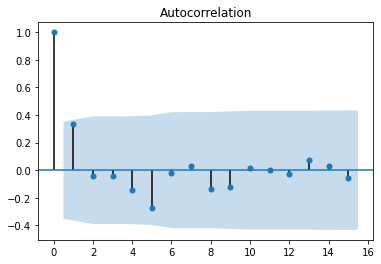

In [19]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the breusch-godfrey test for no autocorrelation of residuals
test_results = diag.acorr_breusch_godfrey(est, nlags = lag)

# grab the p-values and the test statistics
p_val = test_results

# print the results of the test
print('Breusch-Godfrey test :')
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("H0 diterima, maka tidak terdapat masalah autokorelasi.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("H0 ditolak, maka terdapat masalah autokorelasi.")
    print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
test_results = diag.acorr_ljungbox(est.resid)#, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
print('Ljung-Box test :')
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("H0 diterima, maka tidak terdapat masalah autokorelasi.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("H0 ditolak, maka terdapat masalah autokorelasi.")
    print('-'*100)

# print the results of the test
auto = est.resid.autocorr()

print('menggunakan .autocorr() :')
if auto > 0.05:
    print("The lowest p-value found was {:.4}".format(auto))
    print("H0 diterima, maka tidak terdapat masalah autokorelasi.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(auto))
    print("H0 ditolak, maka terdapat masalah autokorelasi.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

### Checking For Normally Distributed Residuals

Selanjutnya untuk melihat dataset yang dipakai valid atau tidak adalah dengan membuktikan bahwa dataset berdistribusi normal yang di mana sebagai syarat dari multivariate regression. untuk melihat apakah data yang digunakan berdistribusi normal atau tidak salah satu caranya adalah dengan memvisualisasikan data menggunakan statsmodels.api.qqplot, namun ini hanya pemeriksaan secara visual saja sehingga untuk penentuan normal tidaknya agak subjektif

Selain itu, kita perlu memeriksa asumsi lain, bahwa rata-rata residualnya harus sama dengan nol atau mendekati nol.

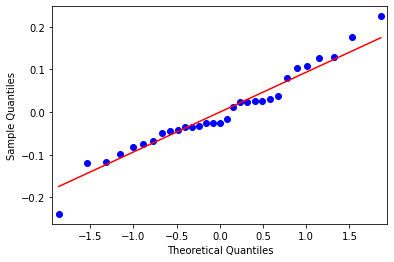

rata-rata residualnya adalah 2.641e-17


In [23]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print('='*100)
print("rata-rata residualnya adalah {:.4}".format(mean_residuals))
print('='*100)

Karena data telah memenuhi semua uji asumsi klasik, maka data tersebut dapat digunakan pada model multivariate regression.

In [24]:
# print out a summary
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     60.09
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           4.48e-12
Time:                        08:05:30   Log-Likelihood:                 29.487
No. Observations:                  31   AIC:                            -50.97
Df Residuals:                      27   BIC:                            -45.24
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.2795      0.055     -5.127      

## Uji Signifikansi Parameter

Selanjutnya, dilakukan Uji Parsial (Uji t) dan Uji Simultan (Uji F) untuk meliihat pengaruh dari Temperature, Leaflets, Price terhadap keuntungan

### Uji Parsial (Uji t)

**Rumusan Hipotesis**

H0 : Variabel bebas secara parsial berpengaruh signifikan terhadap variabel terikat

H1 : variabel bebas secara parsial tidak berpengaruh signifikan terhadap variabel terikat

**Kriteria Uji**

dengan mengambil α sebesar 0.05, jika probbabilitas variabel bebas < α maka H0 diterima

Harapan kita di sini adalah untuk menerima hipotesis nol, dengan probbabilitas variabel bebas yang kurang dari 0.05 yang artinya Variabel bebas secara parsial berpengaruh signifikan terhadap variabel terikat

In [25]:
print('='*100)
for i in range(1, len(est.pvalues)):
  if est.pvalues[i] > 0.05:
    print("probbabilitas variabel {} : {:.4}".format(est.pvalues.index[i], est.pvalues[i]))
    print("H0 ditolak, maka variabel bebas secara parsial tidak berpengaruh signifikan terhadap variabel terikat.")
    print('='*100)
  else:
    print("probbabilitas variabel {} : {:.4}".format(est.pvalues.index[i], est.pvalues[i]))
    print("H0 diterima, maka Variabel bebas secara parsial berpengaruh signifikan terhadap variabel terikat.")
    print('='*100)

probbabilitas variabel Temperature : 0.006463
H0 diterima, maka Variabel bebas secara parsial berpengaruh signifikan terhadap variabel terikat.
probbabilitas variabel Leaflets : 1.173e-07
H0 diterima, maka Variabel bebas secara parsial berpengaruh signifikan terhadap variabel terikat.
probbabilitas variabel Price : 1.545e-10
H0 diterima, maka Variabel bebas secara parsial berpengaruh signifikan terhadap variabel terikat.


### Uji Simultan (Uji F)

**Rumusan Hipotesis**

H0 : Model yang digunakan signifikan

H1 : Model yang digunakan tidak signifikan

**Kriteria Uji**

dengan mengambil α sebesar 0.05, jika probbabilitas variabel bebas < α maka H0 diterima

Harapan kita di sini adalah untuk menerima hipotesis nol, dengan probbabilitas variabel bebas yang kurang dari 0.05 yang artinya Model yang digunakan signifikan

In [26]:
print('='*100)
if est.f_pvalue > 0.05:
  print("F-statistic: : {:.4}".format(est.f_pvalue))
  print("H0 ditolak, maka Model yang digunakan tidak signifikan")
  print('='*100)
else:
  print("F-statistic: : {:.4}".format(est.f_pvalue))
  print("H0 diterima, maka Model yang digunakan signifikan")
  print('='*100)

F-statistic: : 4.48e-12
H0 diterima, maka Model yang digunakan signifikan


Berdasarkan hasil pengujian di atas prob. (F-Statistic) = 4.48e-12 < 0.05, maka H0 diterima. Hal ini berarti variabel Temperature, Leaflets, dan Price berpengaruh secara signifikan terhadap variabel income

### Koefisien Determinasi

***R-squared*** adalah salah satu ukuran yang digunakan untuk menilai seberapa baik variabel independen yang digunakan untuk menjelaskan variasi pada variabel dependen. Semakin besar nilainya atau semakin mendekati ***1***, semakin baik modelnya.

Pada hasil model regresi ***est.summary()*** di atas didapatkan nilai R-squared sebesar ***0.870.*** Hal ini menunjukkan bahwa presentase variabel tak bebas ***'income'*** yang dijelaskan oleh variabel bebas sebesar ***87%*** dan sekitar ***13%*** sisanya dipengaruhi oleh faktor-faktor lain di luar variabel bebas yang digunakan dalam model.